In [2]:
import pandas as pd

/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [20]:
#read animal_cases.csv as df
df = pd.read_csv('Datasets/animal_cases.csv')

/var/folders/qf/yh559xpx4dv12z0mkyw5cvr80000gn/T/ipykernel_2926/1177899459.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Datasets/animal_cases.csv')


In [5]:
# print number ofo ONTIME and LATE
print(df['on_time'].value_counts())

on_time
ONTIME     79745
OVERDUE     3536
Name: count, dtype: int64


In [9]:
df.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source', 'year'],
      dtype='object')

In [17]:
# add the time aa request needed to be resolved. Taake open_dt and closed_dt
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])
df['time_to_resolve'] = df['closed_dt'] - df['open_dt']
df['time_to_resolve'] = df['time_to_resolve'].dt.days

In [15]:
df.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year,time_to_resolve
0,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 16,1602,305 Freeport St,2122.0,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated,2011,0.0
1,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1801,10 Ledgebrook Rd,2126.0,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call,2011,0.0
2,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 2,0202,114 Sixteenth St,2129.0,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call,2011,0.0
3,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 15,1504,10 Hendry St,2125.0,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated,2011,0.0
4,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1813,69 Davison St,2136.0,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated,2011,0.0


In [34]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])
df['resolution_hours'] = (df['closed_dt'] - df['open_dt']).dt.total_seconds() / 3600
df['resolution_hours'].head(10)
#new column for resolution hours for ONTIME
df['resolution_hours_ontime'] = df['resolution_hours'][df['on_time'] == 'ONTIME']

#new column for resolution hours for LATE
df['resolution_hours_late'] = df['resolution_hours'][df['on_time'] == 'OVERDUE']

<AxesSubplot:ylabel='neighborhood'>

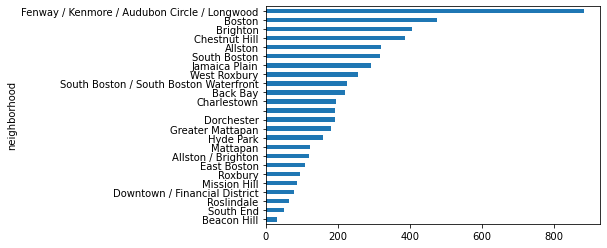

In [29]:
# plot the avg resolution time by neighborhood
df.groupby('neighborhood')['resolution_hours'].mean().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='neighborhood'>

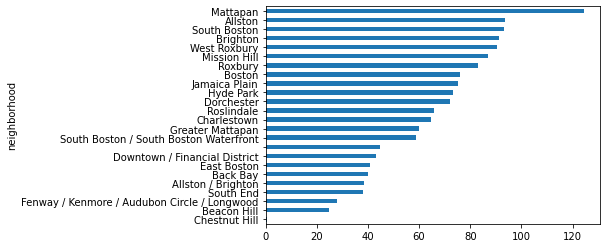

In [32]:
# plot resolution time for ONTIME
df.groupby('neighborhood')['resolution_hours_ontime'].mean().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='neighborhood'>

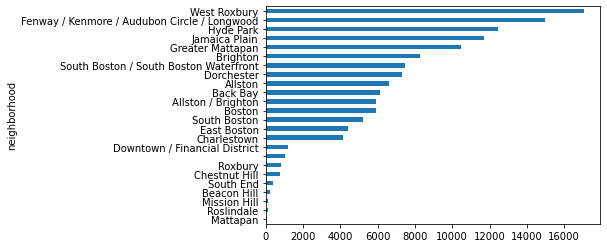

In [35]:
df.groupby('neighborhood')['resolution_hours_late'].mean().sort_values().plot(kind='barh')

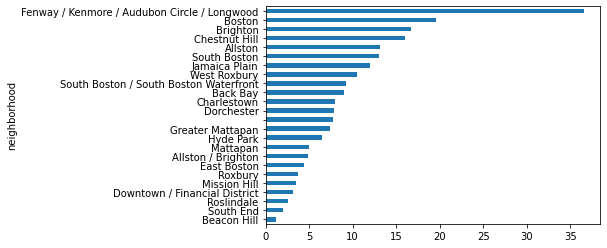

In [37]:
df['resolution_days'] = (df['closed_dt'] - df['open_dt']).dt.days
df['resolution_days'].head(10)
# plot the avg resolution time by neighborhood
df.groupby('neighborhood')['resolution_days'].mean().sort_values().plot(kind='barh')

df['resolution_days_ontime'] = df['resolution_days'][df['on_time'] == 'ONTIME']
df['resolution_days_late'] = df['resolution_days'][df['on_time'] == 'OVERDUE']

<AxesSubplot:ylabel='neighborhood'>

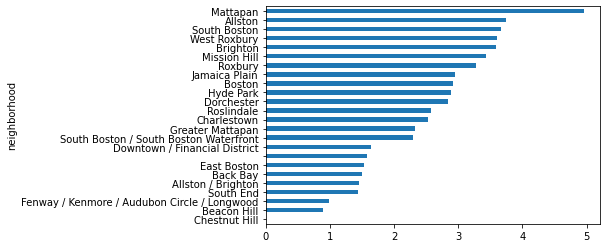

In [39]:
#plot the average resolution days for ONTIME
df.groupby('neighborhood')['resolution_days_ontime'].mean().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='neighborhood'>

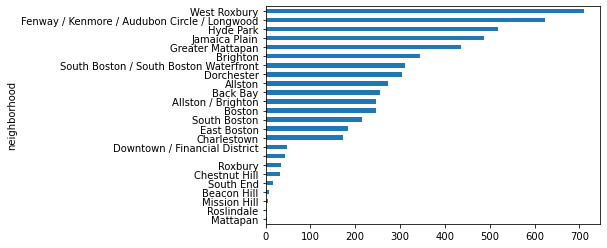

In [40]:
#plot the average resolution days for LATE
df.groupby('neighborhood')['resolution_days_late'].mean().sort_values().plot(kind='barh')

In [44]:
# print the row with the longest reslution days for LATE
print(df[df['resolution_days_late'] == df['resolution_days_late'].min()])

       case_enquiry_id             open_dt        sla_target_dt  \
3314      101000793093 2013-02-28 02:57:27  2013-02-28 02:57:27   
16055     101001706554 2016-02-02 03:30:00  2016-02-02 03:30:51   
36837     101002873919 2019-04-04 08:49:28  2019-04-04 08:49:28   
39218     101002959520 2019-07-12 04:06:20  2019-07-12 04:06:20   
41944     101003065790 2019-10-09 10:48:41  2019-10-09 10:48:41   

                closed_dt  on_time case_status  \
3314  2013-02-28 08:02:11  OVERDUE      Closed   
16055 2016-02-02 04:39:33  OVERDUE      Closed   
36837 2019-04-04 13:11:11  OVERDUE      Closed   
39218 2019-07-12 05:16:55  OVERDUE      Closed   
41944 2019-10-09 14:54:53  OVERDUE      Closed   

                                          closure_reason           case_title  \
3314                Case Closed Case Resolved picked up   Pick up Dead Animal   
16055  Case Closed. Closed date : 2016-02-02 09:39:33...  Pick up Dead Animal   
36837  Case Closed. Closed date : 2019-04-04 17:11:11